## Pair Programming - Regresión lineal 3

### Asunciones

---

### 1. Importamos las librerías necesarias.

In [49]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
from scipy import stats
import researchpy as rp
from scipy.stats import levene

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [50]:
plt.rcParams["figure.figsize"] = (10,10)
sns.set_palette("flare")

### 2. Abrimos el archivo con el que vamos a trabajar.

In [51]:
df = pd.read_csv("../archivos/metro_A.csv", index_col=0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48187 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          48187 non-null  object 
 1   weekday         48187 non-null  object 
 2   cat_time        48187 non-null  object 
 3   holiday_cat     48187 non-null  object 
 4   temp_c          48187 non-null  float64
 5   snow_1h         48187 non-null  float64
 6   traffic_volume  48187 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 2.9+ MB


In [53]:
df.head(2)

,season,weekday,cat_time,holiday_cat,temp_c,snow_1h,traffic_volume
0,Autumn,tuesday,morning,no,15.13,0.0,5545
1,Autumn,tuesday,morning,no,16.21,0.0,4516



### 3. Evaluamos la Asunción de Normalidad de la variable respuesta.

Esta asunción fue evaluada visual y analíticamente en el notebook anterior y nos indica que no hay normalidad en los datos, aceptando la H0.

### 4. Evaluamos la Asunción de Homocedasticidad de varianzas.


#### 4.1. Gráficas para variables categóricas.

Empezamos con las gráficas para ver la homogeneidad.

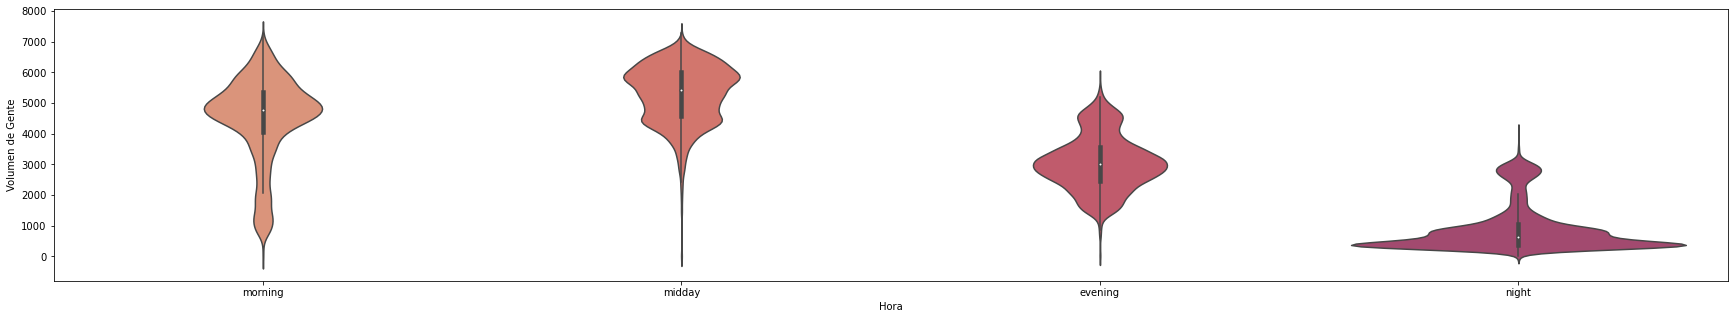

In [54]:
plt.figure( figsize=(30,5))

sns.violinplot(x= "cat_time", y= "traffic_volume", data=df)
plt.ylabel("Volumen de Gente")
plt.xlabel("Hora");


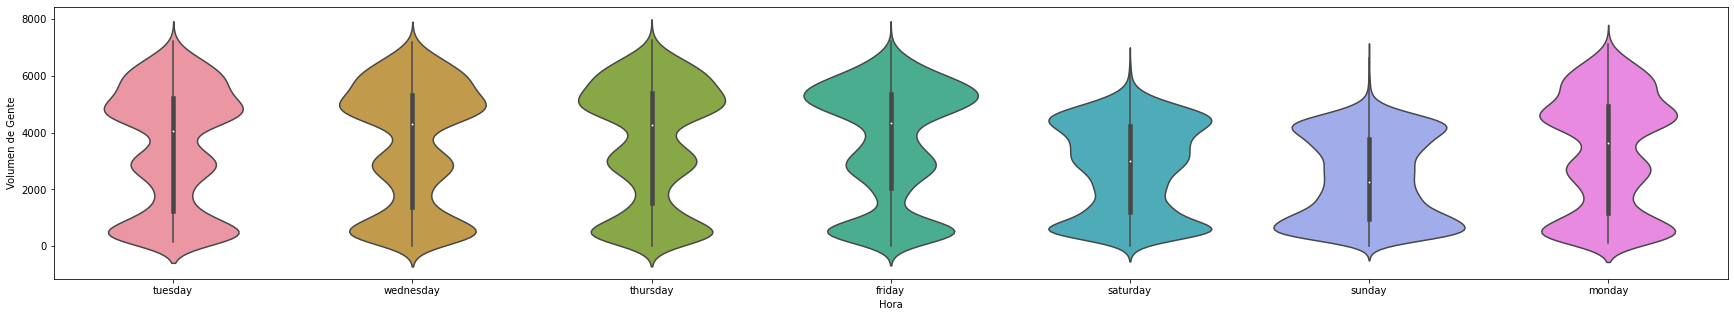

In [55]:
plt.figure( figsize=(30,5))

sns.violinplot(x= "weekday", y= "traffic_volume", data=df)
plt.ylabel("Volumen de Gente")
plt.xlabel("Hora");

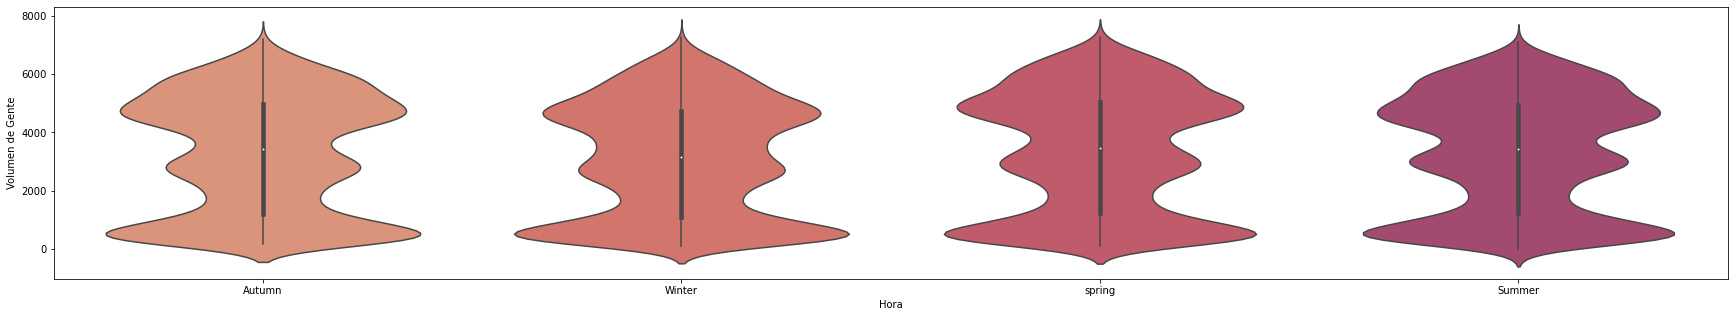

In [56]:
plt.figure( figsize=(30,5))

sns.violinplot(x= "season", y= "traffic_volume", data=df)
plt.ylabel("Volumen de Gente")
plt.xlabel("Hora");

### 4.2. Gráficas para variables numéricas.

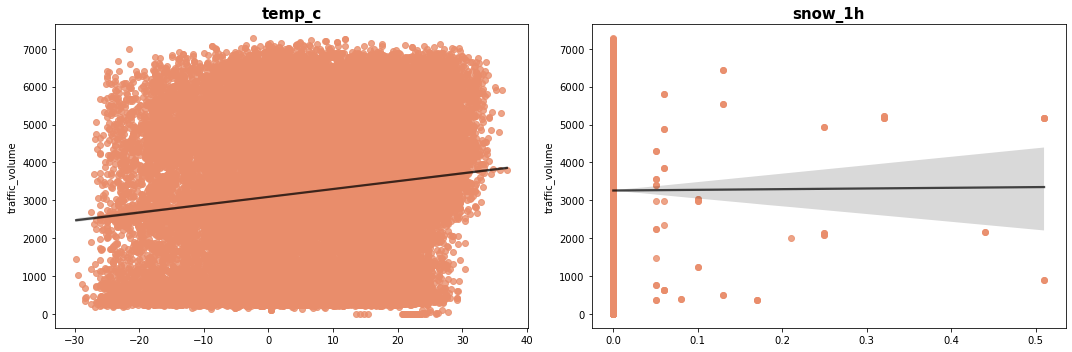

In [57]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).drop('traffic_volume', axis=1)
columnas_numeric = columnas_numeric.columns


for i, colum in enumerate(columnas_numeric): 
    sns.regplot(data = df, x = colum, y = 'traffic_volume', line_kws = {"color": "black", "alpha": 0.7 }, ax = axes[i])
    
   
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    axes[i].tick_params(labelsize = 10)

    axes[i].set_xlabel("")

fig.tight_layout();

Son heterocedásticas, por lo que no cumplen la asunción de homocedasticidad.

### 4.3. Test de Levene

In [58]:
#Variable predictora "holiday_cat"
festivo = df[df["holiday_cat"]== 'si']["traffic_volume"]
no_festivo =df[df["holiday_cat"]== 'no']["traffic_volume"]

In [59]:
levene_test = stats.levene(festivo, no_festivo)
levene_test

LeveneResult(statistic=149.92684277246298, pvalue=2.0237966542201124e-34)

El p-valor es < 0.05, rechazamos la H0, por tanto nuestra varianza en la variable "holiday_cat" es heterocedática.

In [60]:
#Variable predictora "weekday"
lunes = df[df["weekday"]== 'monday']["traffic_volume"]
martes = df[df["weekday"]== 'tuesday']["traffic_volume"]
miercoles = df[df["weekday"]== 'wednesday']["traffic_volume"]
jueves = df[df["weekday"]== 'thursday']["traffic_volume"]
viernes = df[df["weekday"]== 'friday']["traffic_volume"]
sabado = df[df["weekday"]== 'saturday']["traffic_volume"]
domingo = df[df["weekday"]== 'sunday']["traffic_volume"]


In [61]:
levene_test = stats.levene(lunes,martes,miercoles,jueves,viernes,sabado,domingo)
levene_test

LeveneResult(statistic=318.2927542402672, pvalue=0.0)

El p-valor es < 0.05, rechazamos la H0, por tanto nuestra varianza en la variable "weekday" es heterocedástica.

### 5. Evaluamos la Asunción de Independencia entre las variables predictoras.


In [62]:
crosstab, test_results, expected = rp.crosstab(df["holiday_cat"], df["weekday"], test= "chi-square", expected_freqs= True, prop= "cell")


In [63]:
crosstab.head()

weekday                                                          
weekday      friday monday saturday sunday thursday tuesday wednesday     All
holiday_cat                                                                  
no            14.16  14.60    14.17  14.26    14.12   14.20     14.36   99.87
si             0.01   0.07     0.00   0.00     0.02    0.01      0.01    0.13
All           14.17  14.67    14.17  14.26    14.14   14.20     14.37  100.00

In [64]:
expected

weekday                                                     \
weekday           friday      monday     saturday       sunday     thursday   
holiday_cat                                                                   
no           6821.353892  7062.04881  6821.353892  6861.303256  6807.371615   
si              8.646108     8.95119     8.646108     8.696744     8.628385   

                                      
weekday         tuesday    wednesday  
holiday_cat                           
no           6835.33617  6917.232366  
si              8.66383     8.767634

In [65]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,107.6380
1,p-value =,0.0000
2,Cramer's V =,0.0473


Dado que el p-valor es menor de 0.05 , las variables comparadas son dependientes ya que rechazamos la H0

In [66]:
crosstab, test_results, expected = rp.crosstab(df["holiday_cat"], df["temp_c"], test= "chi-square", expected_freqs= True, prop= "cell")

In [67]:
crosstab

temp_c                                         \
temp_c      -29.75999999999999 -29.529999999999973 -28.92999999999998   
holiday_cat                                                             
no                         0.0                 0.0                0.0   
si                         0.0                 0.0                0.0   
All                        0.0                 0.0                0.0   

                                                                        \
temp_c      -28.329999999999984 -28.25999999999999 -27.529999999999973   
holiday_cat                                                              
no                         0.01                0.0                 0.0   
si                         0.00                0.0                 0.0   
All                        0.01                0.0                 0.0   

                                                                       \
temp_c      -27.44999999999999 -27.109999999999985 -26.99999999999997   
holiday_cat                                                             
no                        0.01                 0.0                0.0   
si                        0.00                 0.0                0.0   
All                       0.01                 0.0                0.0   

                                 ...                                      \
temp_c      -26.889999999999983  ... 34.54000000000002 34.72000000000003   
holiday_cat                      ...                                       
no                          0.0  ...               0.0               0.0   
si                          0.0  ...               0.0               0.0   
All                         0.0  ...               0.0               0.0   

                                                                   \
temp_c      35.09000000000003 35.28000000000003 35.72000000000003   
holiday_cat                                                         
no                        0.0               0.0               0.0   
si                        0.0               0.0               0.0   
All                       0.0               0.0               0.0   

                                                                   \
temp_c      35.80000000000001 35.93000000000001 36.14000000000004   
holiday_cat                                                         
no                        0.0               0.0               0.0   
si                        0.0               0.0               0.0   
All                       0.0               0.0               0.0   

                                        
temp_c      36.920000000000016     All  
holiday_cat                             
no                         0.0   99.87  
si                         0.0    0.13  
All                        0.0  100.00  

[3 rows x 5843 columns]

In [68]:
expected

temp_c                                                    \
temp_c         -29.76    -29.53    -28.93    -28.33    -28.26    -27.53   
holiday_cat                                                               
no           0.998734  0.998734  0.998734  2.996202  0.998734  0.998734   
si           0.001266  0.001266  0.001266  0.003798  0.001266  0.001266   

                                                     ...                      \
temp_c         -27.45    -27.11    -27.00    -26.89  ...     34.53     34.54   
holiday_cat                                          ...                       
no           2.996202  0.998734  1.997468  0.998734  ...  0.998734  0.998734   
si           0.003798  0.001266  0.002532  0.001266  ...  0.001266  0.001266   

                                                                         \
temp_c          34.72     35.09     35.28     35.72     35.80     35.93   
holiday_cat                                                               
no           0.998734  0.998734  0.998734  0.998734  0.998734  0.998734   
si           0.001266  0.001266  0.001266  0.001266  0.001266  0.001266   

                                 
temp_c          36.14     36.92  
holiday_cat                      
no           0.998734  0.998734  
si           0.001266  0.001266  

[2 rows x 5842 columns]

In [69]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 5841.0) =,6082.5258
1,p-value =,0.0135
2,Cramer's V =,0.3553


Obviamente el p-valor es menor de 0.05 y por tanto rechazamos H0, lo que quiere decir que las variables de "holiday_cat" y "temp_c" son dependientes.